In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import random
warnings.filterwarnings("ignore")
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from keras.optimizers import Adam, SGD
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical

In [17]:
test = pd.read_csv("test.csv")
print(test.shape)
test.head()


(10000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
train = pd.read_csv("train.csv")
print(train.shape)
train.head()


(60000, 785)


,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
Y_train = train["label"]
X_train = train.drop(labels=["label"],axis=1)

Y_test = test["label"]
X_test = test.drop(labels=["label"],axis=1)

<function matplotlib.pyplot.show(close=None, block=None)>

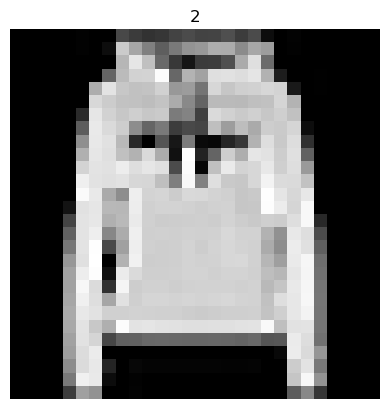

In [20]:
img = X_train.iloc[1284].to_numpy().reshape(28,28)
plt.imshow(img,cmap="gray")
plt.title(train.iloc[1284,0])
plt.axis("off")
plt.show

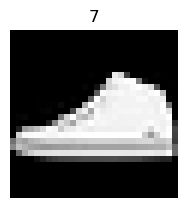

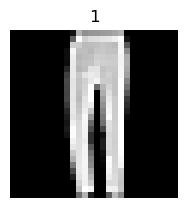

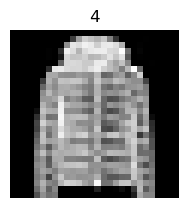

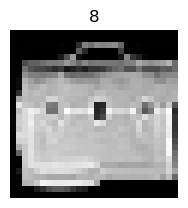

In [21]:
plt.subplot(2,2,1)
img1 = X_train.iloc[631].to_numpy().reshape(28,28)
plt.imshow(img1,cmap="gray")
plt.title(train.iloc[631,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,2)
img2=X_train.iloc[999].to_numpy().reshape(28,28)
plt.imshow(img2,cmap="gray")
plt.title(train.iloc[999,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,3)
img3=X_train.iloc[834].to_numpy().reshape(28,28)
plt.imshow(img3,cmap="gray")
plt.title(train.iloc[834,0])
plt.axis("off")
plt.show()

plt.subplot(2,2,4)
img3=X_train.iloc[1634].to_numpy().reshape(28,28)
plt.imshow(img3,cmap="gray")
plt.title(train.iloc[1234,0])
plt.axis("off")
plt.show()

In [22]:
X_train = X_train / 255.0
X_test = X_test / 255.0

test = test / 255.0

print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (60000, 784)
test shape:  (10000, 785)


In [23]:
# Reshape

print(type(X_train))
print(type(X_test))

X_train = X_train.to_numpy().reshape(-1,28,28,1)
X_test = X_test.to_numpy().reshape(-1,28,28,1)   

print(X_train.shape)
print(X_test.shape)

print(type(X_train))
print(type(X_test))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>
(60000, 28, 28, 1)
(10000, 28, 28, 1)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [24]:
Y_train = to_categorical(Y_train,num_classes=10)
Y_test = to_categorical(Y_test,num_classes=10)

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val = train_test_split(X_train,Y_train,random_state=42,test_size=0.1)

print("x_train shape",X_train.shape)
print("X_val shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("Y_val shape",Y_val.shape)

x_train shape (54000, 28, 28, 1)
X_val shape (6000, 28, 28, 1)
y_train shape (54000, 10)
Y_val shape (6000, 10)


In [27]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding="Same",activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(128,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256,kernel_size=(3,3),padding="Same",activation="relu"))
model.add(MaxPool2D())
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(10,activation="softmax"))

In [28]:
optimizer = Adam(learning_rate=0.0001,beta_1=0.9,beta_2=0.999)
model.compile(optimizer=optimizer,
             loss="categorical_crossentropy",
             metrics=["accuracy"])                # bunu 0.00005 yap

In [29]:
#  Modele Bakalım
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_8 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 dropout_9 (Dropout)         (None, 14, 14, 32)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 64)        

In [30]:
# Verileri arttırma

datagen = ImageDataGenerator(
        featurewise_center=False,  # veri seti üzerinde giriş ortalamasını 0'a ayarla
        samplewise_center=False,  # her örneğin ortalamasını 0'a ayarla
        featurewise_std_normalization=False,  # veri setinin std ile girişleri böl
        samplewise_std_normalization=False,  # her bir girişi kendi std ile böl
        zca_whitening=False,  # boyut azaltma işlemi
        rotation_range=5,  # görüntüleri rastgele 5 derece döndür
        zoom_range = 0.1, # rastgele görüntüleri %5 zoomla
        width_shift_range=0.1,  # görüntüleri yatayda rastgele %5 kaydır
        height_shift_range=0.1,  # görüntüleri dikeyde rastgele %5 kaydır
        horizontal_flip=False,  # görüntüleri yatayda rastgele çevir
        vertical_flip=False)  # görüntüleri dikeyde rastgele çevirme

datagen.fit(X_train)


In [31]:
epochs=30
batch_size = 64


history = model.fit(datagen.flow(X_train,Y_train,batch_size=batch_size),
                             epochs=epochs,validation_data=(X_val,Y_val),
                             steps_per_epoch=X_train.shape[0]//batch_size)

Epoch 1/30
843/843 [==============================] - 27s 32ms/step - loss: 1.2067 - accuracy: 0.5636 - val_loss: 0.7113 - val_accuracy: 0.7160
Epoch 2/30
843/843 [==============================] - 30s 35ms/step - loss: 0.7940 - accuracy: 0.6988 - val_loss: 0.5605 - val_accuracy: 0.7787
Epoch 3/30
843/843 [==============================] - 26s 31ms/step - loss: 0.7000 - accuracy: 0.7329 - val_loss: 0.5259 - val_accuracy: 0.7960
Epoch 4/30
843/843 [==============================] - 29s 34ms/step - loss: 0.6374 - accuracy: 0.7538 - val_loss: 0.5042 - val_accuracy: 0.8032
Epoch 5/30
843/843 [==============================] - 26s 31ms/step - loss: 0.5981 - accuracy: 0.7696 - val_loss: 0.4665 - val_accuracy: 0.8180
Epoch 6/30
843/843 [==============================] - 26s 31ms/step - loss: 0.5578 - accuracy: 0.7868 - val_loss: 0.4041 - val_accuracy: 0.8417
Epoch 7/30
843/843 [==============================] - 26s 31ms/step - loss: 0.5238 - accuracy: 0.7992 - val_loss: 0.3871 - val_accuracy:

In [32]:
score = model.evaluate(X_val,Y_val,verbose=0)
print("Val Loss : ",score[0])
print("Val Accuracy : ",score[1])

# Aralarındaki doğruluk oranı fazlaysa overfitting söz konusu olabilir

score = model.evaluate(X_test, Y_test, verbose=0)
print("Test Loss : ", score[0])  
print("Test Accuracy : ", score[1]) 


Val Loss :  0.23827852308750153
Val Accuracy :  0.9076666831970215
Test Loss :  0.23183301091194153
Test Accuracy :  0.9120000004768372


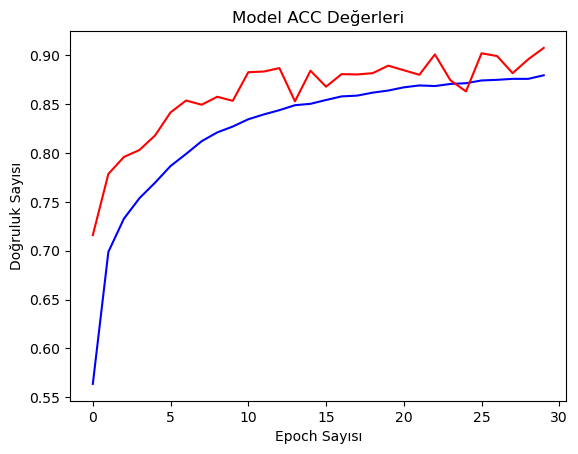

In [33]:
plt.plot(history.history["accuracy"],label="Train ACC",color="b")
plt.plot(history.history["val_accuracy"],label="Validation ACC",color="r")
plt.xlabel("Epoch Sayısı")
plt.ylabel("Doğruluk Sayısı")
plt.title("Model ACC Değerleri")
plt.show()

Text(0.5, 1.0, 'Model Loss Değerleri')

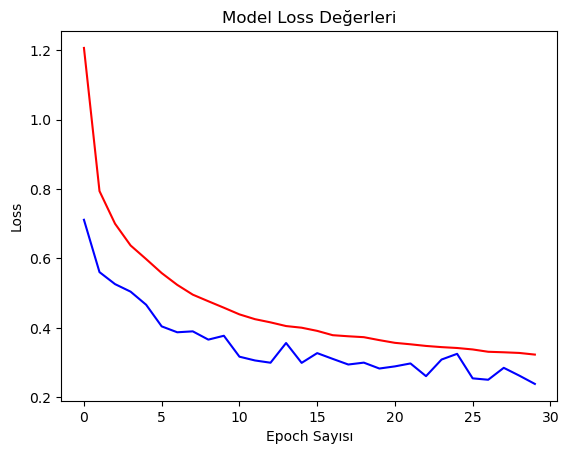

In [34]:
plt.plot(history.history["val_loss"],label="Validation Loss",color="b")
plt.plot(history.history["loss"],label="Train Loss",color="r")
plt.xlabel("Epoch Sayısı")
plt.ylabel("Loss")
plt.title("Model Loss Değerleri")